### Project- MovieLens Data Analysis_Astha

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/Users/AsthaBhatia/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
Ratings = pd.read_csv('Data.csv')
Ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
Movie = pd.read_csv('item.csv')
Movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
User = pd.read_csv('user.csv')
User.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

### Dataset = Ratings

In [6]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
Ratings.shape

(100000, 4)

In [8]:
Ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [9]:
Ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

### Dataset = Movie

In [10]:
Movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [11]:
Movie.shape

(1681, 22)

In [12]:
Movie.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
Movie.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

### Dataset = User

In [14]:
User.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [15]:
User.shape

(943, 5)

In [16]:
User.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [17]:
User.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [18]:
# use sum on the default axis
Movie.loc[:,'unknown':'Western'].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [19]:
#hint: use sum on the axis = 1
Movie['No. of Genre'] = Movie.loc[:,'movie title':'Western'].sum(axis=1)
Movie.head()
Movie.shape

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,No. of Genre
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3


(1681, 23)

In [20]:
#Taking columns movie title & no. of genre
Movie_title_genre = Movie[['movie title', 'No. of Genre']]
Movie_title_genre.head()

,movie title,No. of Genre
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3


In [21]:
#Filtering No. of genre (>1) and sorting in ascending order
Movie_genre = Movie_title_genre[Movie['No. of Genre']>1].sort_values(by = 'No. of Genre', ascending=True)
Movie_genre

,movie title,No. of Genre
1678,Sliding Doors,2
1159,Palookaville,2
623,"Sword in the Stone, The",2
624,So Dear to My Heart,2
626,Sleepers,2
...,...,...
100,Heavy Metal,5
1074,"Pagemaster, The",5
558,"Kid in King Arthur's Court, A",6
171,"Empire Strikes Back, The",6


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [22]:
Movie = Movie[Movie.unknown != 1]
Movie.shape

(1680, 23)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [23]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [24]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


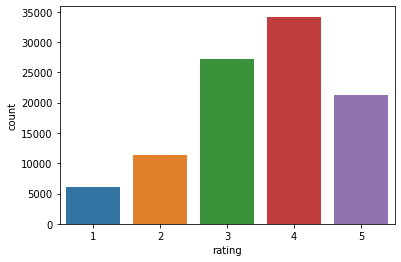

In [25]:
#Rating
sns.countplot(Ratings['rating']);

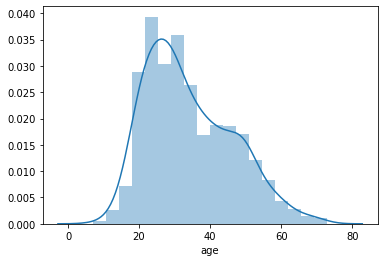

In [26]:
#Age
sns.distplot(User['age']);

In [27]:
#Adding a new column 'relase year' by splitting release date
Movie['release year'] = Movie['release date'].apply(lambda x : x.split('-')[2]).astype(int)
Movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,No. of Genre,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,3,1995


<Figure size 1080x432 with 0 Axes>

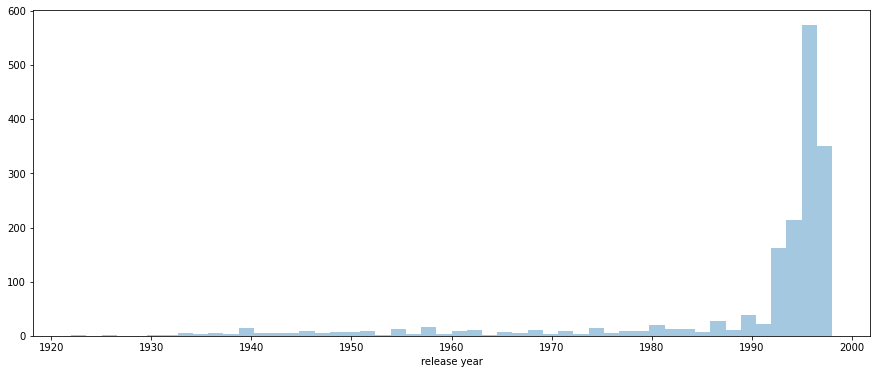

In [28]:
#release year-dist plot
plt.figure(figsize = (15,6))
sns.distplot(Movie['release year'], kde=False)

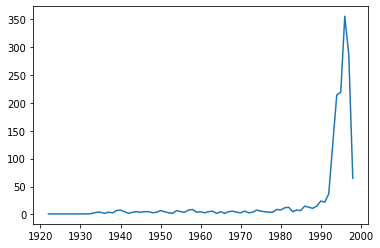

In [29]:
#release year-line plot
plt.plot(Movie.groupby('release year')['release year'].count())

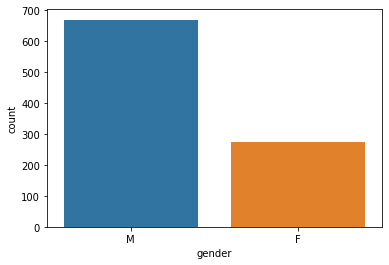

In [30]:
#gender
sns.countplot(User['gender']);

<Figure size 1440x720 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

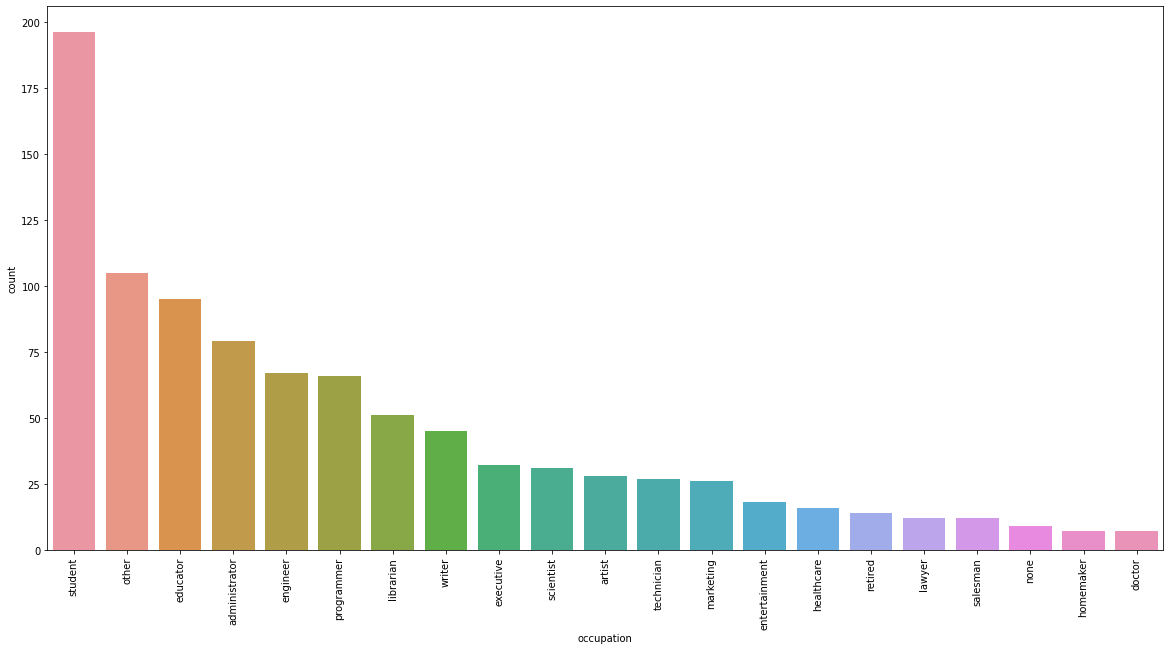

In [31]:
#occupation 
plt.figure(figsize = (20,10))
plt.xticks(rotation = 90)
sns.countplot(User['occupation'], order = User['occupation'].value_counts().index)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [32]:
#creating a dataframe with release year & genre
Movie_release = Movie.groupby('release year').sum().T
genre_year = Movie_release.drop(['movie id','No. of Genre', 'unknown'], axis=0)
genre_year

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1
Film-Noir,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,2,2


<Figure size 2160x720 with 0 Axes>

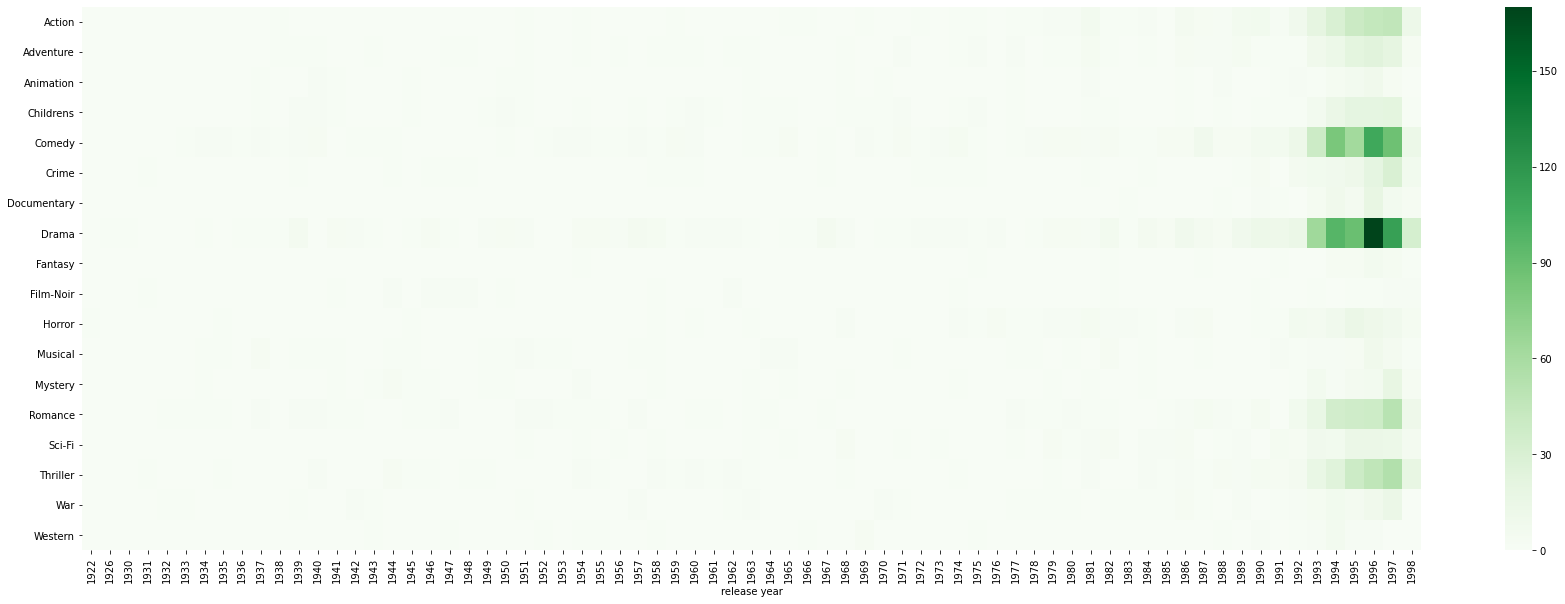

In [33]:
#Heatmap
plt.figure(figsize = (30,10))
sns.heatmap(genre_year, cmap = "Greens")

Conclusion: Drama & comedy genres have gained popularity in the 90's.

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [34]:
#Merging the 3 data frames
Movie_User = pd.merge(Ratings, User, how = 'inner', on='user id')
df = pd.merge(Movie, Movie_User, how = 'inner', on='movie id')
df.head()
df.shape

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Western,No. of Genre,release year,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,3,1995,244,4,880604405,28,M,technician,80525
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,3,1995,298,5,884126061,44,M,executive,01581
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,3,1995,253,5,891628467,26,F,librarian,22903
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,3,1995,305,5,886323153,23,M,programmer,94086
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,3,1995,6,4,883599478,42,M,executive,98101


(99990, 31)

In [35]:
#Creating a dataframe for Mean-Rating
Mean_Rating = pd.DataFrame(df.groupby(['movie id','movie title']).mean()['rating'].sort_values(ascending=False))
Mean_Rating

,,rating
movie id,movie title,
1293,Star Kid,5.0
1599,Someone Else's America,5.0
814,"Great Day in Harlem, A",5.0
1122,They Made Me a Criminal,5.0
1201,Marlene Dietrich: Shadow and Light (,5.0
...,...,...
439,Amityville: A New Generation,1.0
1562,"Eye of Vichy, The (Oeil de Vichy, L')",1.0
1563,"Promise, The (Versprechen, Das)",1.0


In [36]:
#Creating a dataframe for no. of ratings
Ratings_100 = pd.DataFrame(df.groupby(['movie id','movie title']).count()['rating'].sort_values(ascending=False))
Ratings_100

,,rating
movie id,movie title,
50,Star Wars,583
258,Contact,509
100,Fargo,508
181,Return of the Jedi,507
294,Liar Liar,485
...,...,...
1570,Quartier Mozart,1
1571,Touki Bouki (Journey of the Hyena),1
1572,Wend Kuuni (God's Gift),1


In [37]:
#Merging above 2 dataframes, filtering no. of rating>100, sorting mean rating in descending order & taking top 25
RM = pd.merge(Ratings_100, Mean_Rating, how = 'inner', on=['movie id','movie title'])
RM
RM_100 = RM[RM['rating_x'] >100]
RM_100
RM_100.sort_values(by = 'rating_y', ascending = False).head(25)

,,rating_x,rating_y
movie id,movie title,,
50,Star Wars,583,4.358491
258,Contact,509,3.803536
100,Fargo,508,4.155512
181,Return of the Jedi,507,4.007890
294,Liar Liar,485,3.156701
...,...,...,...
1570,Quartier Mozart,1,1.000000
1571,Touki Bouki (Journey of the Hyena),1,1.000000
1572,Wend Kuuni (God's Gift),1,1.000000


,,rating_x,rating_y
movie id,movie title,,
50,Star Wars,583,4.358491
258,Contact,509,3.803536
100,Fargo,508,4.155512
181,Return of the Jedi,507,4.007890
294,Liar Liar,485,3.156701
...,...,...,...
264,Mimic,101,2.742574
159,Basic Instinct,101,3.227723
232,Young Guns,101,3.207921


,,rating_x,rating_y
movie id,movie title,,
408,"Close Shave, A",112,4.491071
318,Schindler's List,298,4.466443
169,"Wrong Trousers, The",118,4.466102
483,Casablanca,243,4.456790
64,"Shawshank Redemption, The",283,4.445230
603,Rear Window,209,4.387560
12,"Usual Suspects, The",267,4.385768
50,Star Wars,583,4.358491
178,12 Angry Men,125,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [38]:
#sum along default axis & transposing
gender_genre = df.groupby('gender').sum().loc[:,'Action':'Western'].T
gender_genre

gender,F,M
Action,5442,20147
Adventure,3141,10612
Animation,995,2610
Childrens,2232,4950
Comedy,8068,21764
Crime,1794,6261
Documentary,187,571
Drama,11008,28887
Fantasy,363,989
Film-Noir,385,1348


In [39]:
#Calculating % of women & men by genre
gender_genre.apply(lambda x: x/x.sum()*100).sort_values(by ='F', ascending=False)

gender,F,M
Drama,20.498687,18.181189
Comedy,15.023929,13.698044
Romance,10.908549,8.561592
Action,10.133889,12.680320
Thriller,9.470960,10.564940
Adventure,5.849053,6.679087
Sci-Fi,4.895626,6.357468
Childrens,4.156347,3.115480
War,4.076274,4.537272
Crime,3.340720,3.940611


Conclusion:

Out of all ratings received from women, 20.49% watch drama, 4.89% watch Sci-Fi & 10.90% watch Romance
Out of all ratings recived from men, 18.18% watch drama, 6.35% watch Sci-Fi & 8.56% watch Romance

Hence:
Men watch more drama than women - False

Women watch more Sci-Fi than men - False

Men watch more Romance than women - False
